In [1]:
from prometheus_api_client import *
import prometheus_api_client
from prometheus_api_client.utils import parse_datetime, parse_timedelta
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import datetime
import pandas as pd
# import seaborn as sns
# # Set default Seaborn style
# sns.set(style="darkgrid")
# sns.set_context("talk", font_scale=1.4)
## hides ipython warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30, 10)
#plt.rcParams['figure.figsize'] = (20, 5)

In [454]:
url = "https://prometheus-k8s-openshift-monitoring.apps.playback-next.demo.red-chesterfield.com//"
token = "sha256~MGa-sj--OSCAbU0NKWVm4LZ2_XLFjCkqrOW37MnKugQ"


In [455]:
pc = PrometheusConnect(url=url, headers={"Authorization": "bearer {}".format(token)},disable_ssl=True)

In [4]:
pc

In [338]:
start_time=(datetime.datetime.now() - datetime.timedelta(days=30))
end_time=datetime.datetime.now()
step='15m'

In [456]:
cluster_cpu = pc.custom_query_range(
    query='cluster:cpu_usage_cores:sum', 
    start_time=start_time,
    end_time=end_time,
    step=step,
)
print(type(cluster_cpu))
test_narray = np.array((cluster_cpu[0]['values']))
test_narray.shape
test_cluster_cpu_df = pd.DataFrame(test_narray,columns=['timestamp', 'Cpu_usage'])
test_cluster_cpu_df.timestamp= pd.to_datetime(test_cluster_cpu_df.timestamp, unit="s")
test_cluster_cpu_df["Cpu_usage"]=test_cluster_cpu_df["Cpu_usage"].astype(float)

<class 'list'>


In [453]:
sample_df.head()

,Cpu_usage,Memory_usage(bytes),api_server_requests,api_server_requests_lt
timestamp,,,,
2022-05-24 06:10:09,10.851524,7.902974e+10,29,3.367296
2022-05-24 06:25:09,10.313238,7.976337e+10,37,3.610918
2022-05-24 06:40:09,10.851333,7.848636e+10,19,2.944439
2022-05-24 06:55:09,10.411907,8.006373e+10,30,3.401197
2022-05-24 07:10:09,10.873429,7.883173e+10,21,3.044522


In [457]:
test_cluster_cpu_df.shape

(909, 2)

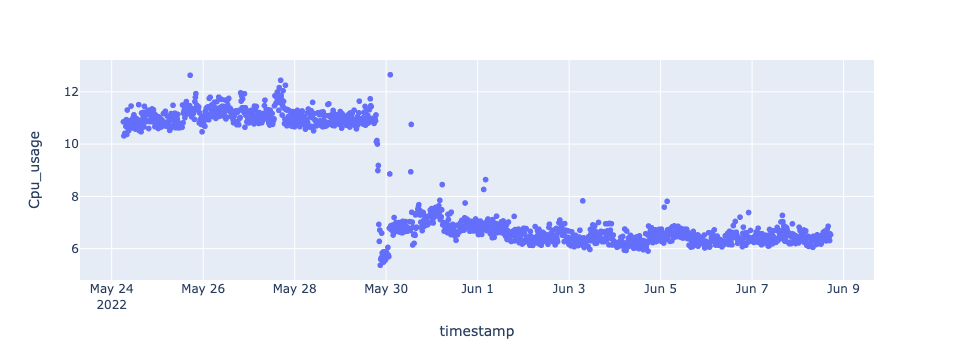

In [341]:
import plotly.express as px
fig = px.scatter(test_cluster_cpu_df, x="timestamp", y="Cpu_usage")
fig.show()

In [343]:
cluster_memory = pc.custom_query_range(
    query='cluster:memory_usage_bytes:sum', 
    start_time=start_time,
    end_time=end_time,
    step=step,
)

In [344]:
test_narray = np.array((cluster_memory[0]['values']))
test_narray.shape
test_cluster_memo_df = pd.DataFrame(test_narray,columns=['timestamp', 'Memory_usage(bytes)'])
test_cluster_memo_df.timestamp= pd.to_datetime(test_cluster_memo_df.timestamp, unit="s")
test_cluster_memo_df["Memory_usage(bytes)"]=test_cluster_memo_df["Memory_usage(bytes)"].astype(float)

In [345]:
test_cluster_memo_df.shape

(1485, 2)

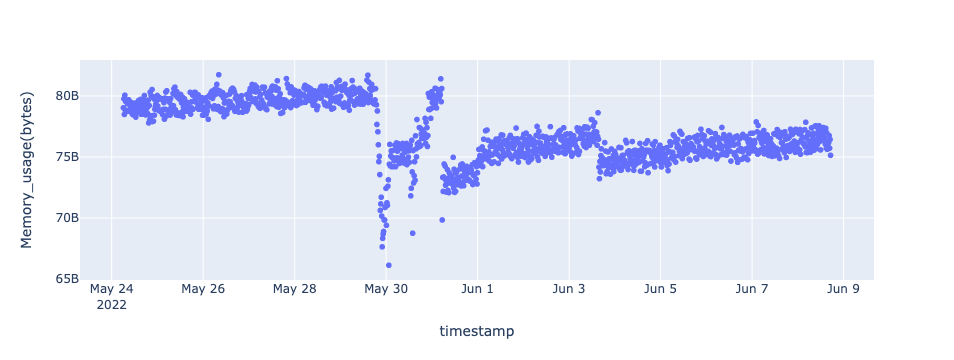

In [346]:
fig2 = px.scatter(test_cluster_memo_df, x="timestamp", y="Memory_usage(bytes)")
fig2.show()

In [347]:
cluster_api_server = pc.custom_query_range(
    query='cluster:apiserver_current_inflight_requests:sum:max_over_time:2m',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
test_narray = np.array((cluster_api_server[0]['values']))
test_narray.shape
cluster_api_server_df = pd.DataFrame(test_narray,columns=['timestamp', 'api_server_requests'])
cluster_api_server_df.timestamp= pd.to_datetime(cluster_api_server_df.timestamp, unit="s")

In [348]:
cluster_api_server_df["api_server_requests"]=cluster_api_server_df["api_server_requests"].astype(int)

In [350]:
cluster_api_server_df.shape

(1485, 2)

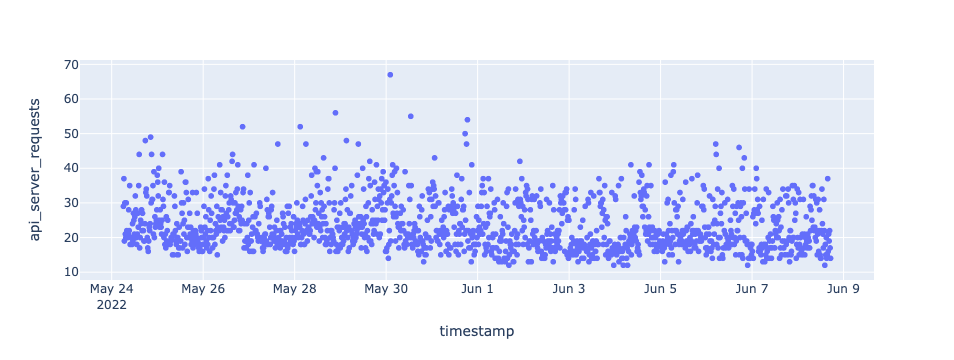

In [351]:
fig3 = px.scatter(cluster_api_server_df, x="timestamp", y="api_server_requests")
fig3.show()

In [356]:
cluster_api_server_df['api_server_requests'].unique()

array([29, 37, 19, 30, 21, 20, 22, 28, 35, 18, 24, 27, 25, 26, 32, 23, 44,
       17, 48, 33, 34, 16, 49, 31, 39, 38, 36, 40, 15, 41, 42, 52, 47, 43,
       56, 14, 67, 55, 13, 50, 54, 12, 46])

In [352]:
cluster_api_server_df['api_server_requests_lt'] = np.log(cluster_api_server_df['api_server_requests'])

In [355]:
cluster_api_server_df['api_server_requests_lt'].head()

0    3.367296
1    3.610918
2    2.944439
3    3.401197
4    3.044522
Name: api_server_requests_lt, dtype: float64

In [362]:
cluster_api_server_df.set_index('timestamp',inplace=True)

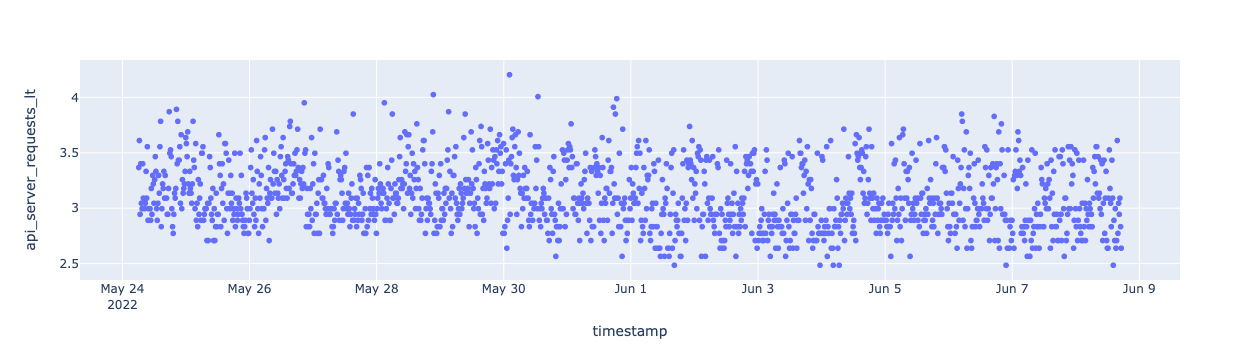

In [357]:
px.scatter(cluster_api_server_df, x="timestamp", y="api_server_requests_lt").show()

In [363]:
concatenated_dataframes = pd.concat(
    [
        test_cluster_cpu_df.reset_index(drop=True),
        test_cluster_memo_df.reset_index(drop=True),
        cluster_api_server_df.reset_index(drop=True)
    ],
    axis=1,
    ignore_index=True,
)

In [364]:
sample_df = pd.concat([test_cluster_cpu_df_2,test_cluster_memo_df,cluster_api_server_df],axis=1).head()

In [365]:
concatenated_dataframes.columns = ['Cpu_usage','Memory_usage(bytes)','api_server_requests','api_server_requests_lt']

In [366]:
concatenated_dataframes['timestamp'] = test_cluster_cpu_df.index

In [368]:
concatenated_dataframes.set_index('timestamp',inplace=True)

In [451]:
sample_df = concatenated_dataframes.copy(deep=True)

In [452]:
sample_df.head()

,Cpu_usage,Memory_usage(bytes),api_server_requests,api_server_requests_lt
timestamp,,,,
2022-05-24 06:10:09,10.851524,7.902974e+10,29,3.367296
2022-05-24 06:25:09,10.313238,7.976337e+10,37,3.610918
2022-05-24 06:40:09,10.851333,7.848636e+10,19,2.944439
2022-05-24 06:55:09,10.411907,8.006373e+10,30,3.401197
2022-05-24 07:10:09,10.873429,7.883173e+10,21,3.044522


In [399]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [415]:
sample_df_decomp = sample_df.asfreq("h")

In [441]:
sample_df.to_csv('sample_cluster_15d_15_min_int.csv')

In [444]:
test_imported_df = pd.read_csv('sample_cluster_15d_15_min_int.csv',index_col='timestamp')

In [445]:
test_imported_df.head()

,Cpu_usage,Memory_usage(bytes),api_server_requests,api_server_requests_lt
timestamp,,,,
2022-05-24 06:10:09,10.851524,7.902974e+10,29,3.367296
2022-05-24 06:25:09,10.313238,7.976337e+10,37,3.610918
2022-05-24 06:40:09,10.851333,7.848636e+10,19,2.944439
2022-05-24 06:55:09,10.411907,8.006373e+10,30,3.401197
2022-05-24 07:10:09,10.873429,7.883173e+10,21,3.044522


In [440]:
sample_df.index[-1] - sample_df.index[0]

Timedelta('15 days 11:00:00')

In [418]:
decomposition = seasonal_decompose(sample_df_decomp['Cpu_usage'],model='additive')

In [419]:
decomposition

In [420]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [377]:
trend.describe()

count    348.000000
mean       8.261661
std        2.098202
min        6.410119
25%        6.557692
50%        6.977369
75%       11.004041
max       11.400827
Name: trend, dtype: float64

In [111]:
import plotly.graph_objects as go

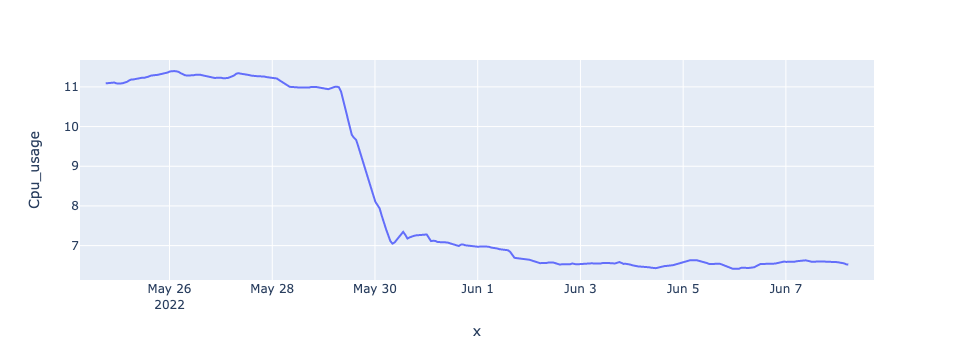

In [421]:
fig4 = px.line(seasonal, x=trend.index, y=trend,labels={'y':'Cpu_usage'})
fig4.show()

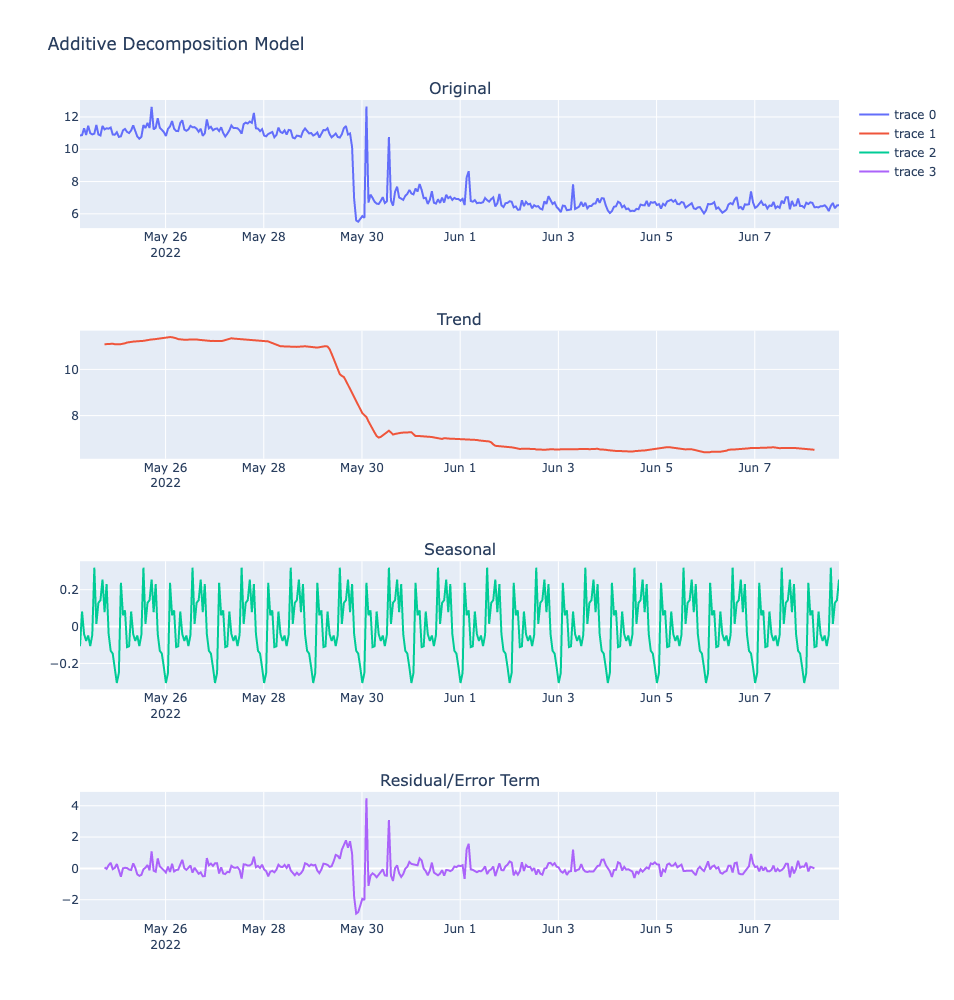

In [422]:
#fig4.add_trace(go.scatter(x=trend.index, y=seasonal),row=1,col=1)
fig4 = make_subplots(rows=4, cols=1,subplot_titles=("Original", "Trend", "Seasonal", "Residual/Error Term"))
fig4.add_trace(go.Scatter(x=sample_df_decomp.index, y=sample_df_decomp.Cpu_usage),row=1, col=1)
fig4.add_trace(go.Scatter(x=trend.index, y=trend),row=2, col=1)
fig4.add_trace(go.Scatter(x=seasonal.index, y=seasonal),row=3, col=1)
fig4.add_trace(go.Scatter(x=residual.index, y=residual),row=4, col=1)
fig4.update_layout(height=1000, width=1000, title_text="Additive Decomposition Model")
fig4.show()

In [423]:
decomposition2 = seasonal_decompose(sample_df_decomp.Cpu_usage,model='multiplicative')

In [424]:
trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

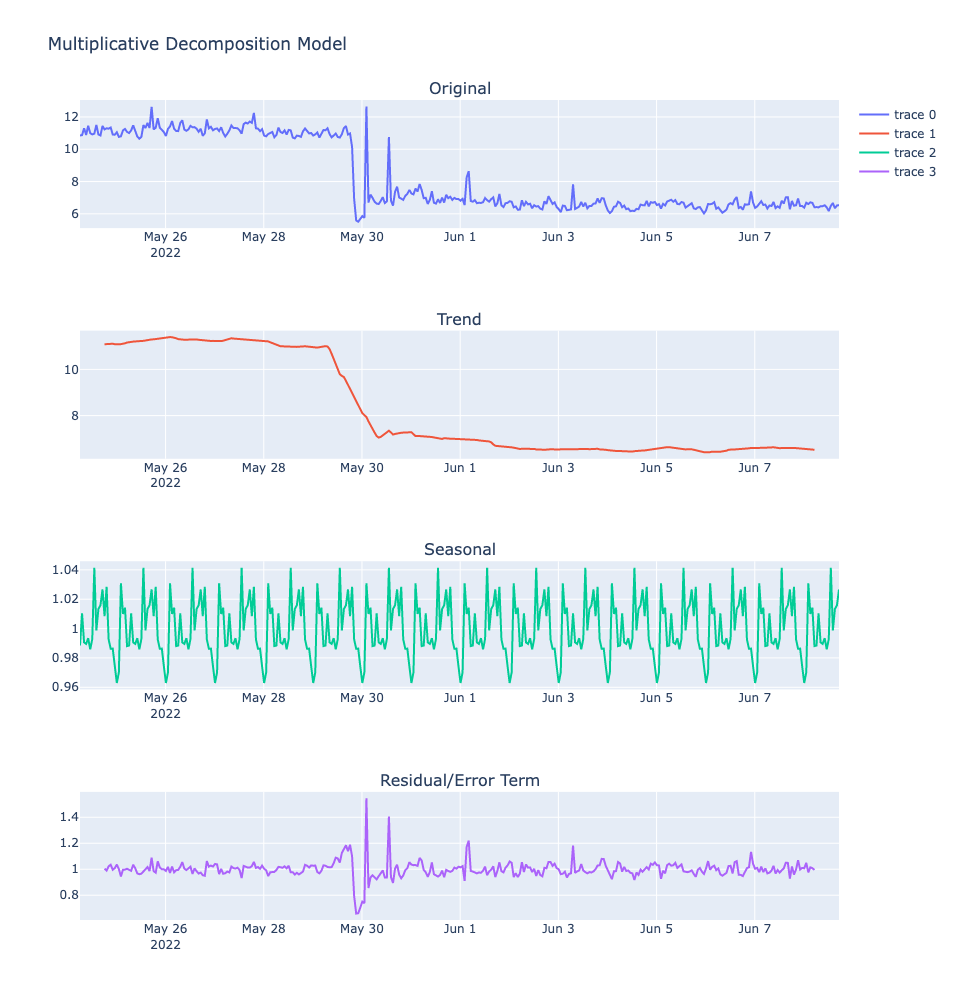

In [426]:
#fig4.add_trace(go.scatter(x=trend.index, y=seasonal),row=1,col=1)
fig5 = make_subplots(rows=4, cols=1,subplot_titles=("Original", "Trend", "Seasonal", "Residual/Error Term"))
fig5.add_trace(go.Scatter(x=sample_df_decomp.index, y=sample_df_decomp.Cpu_usage),row=1, col=1)
fig5.add_trace(go.Scatter(x=trend2.index, y=trend2),row=2, col=1)
fig5.add_trace(go.Scatter(x=seasonal2.index, y=seasonal2),row=3, col=1)
fig5.add_trace(go.Scatter(x=residual2.index, y=residual2),row=4, col=1)
fig5.update_layout(height=1000, width=1000, title_text="Multiplicative Decomposition Model")
fig5.show()

Checking whether the time series data is stationary

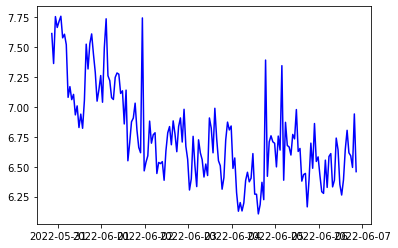

In [190]:
#rolling_mean = pd.rolling_mean(test_cluster_cpu_df_2,window=rolling_window)
#rolling_std = pd.rolling_srd(test_cluster_cpu_df_2,window=rolling_window)

rolling_mean = test_cluster_cpu_df_2.rolling('H').std()
plt.plot(test_cluster_cpu_df_2, color='blue')
#plt.plot(rolling_mean, color='blue')


# test_cluster_cpu_df_2.rolling('H').std()

In [165]:
from statsmodels.tsa.stattools import adfuller

In [166]:
df_test_results = adfuller(test_cluster_cpu_df_2,autolag='AIC')

In [167]:
print(df_test_results)

(-2.8186831725563466, 0.055654170914437105, 8, 160, {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}, 8.06989059406294)


In [171]:
df_test_series = pd.Series(df_test_results[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])

In [172]:
for key,value in df_test_results[4].items():
    df_test_series['Critical Value (%s)'%key] = value

In [173]:
print(df_test_series)

Test Statistics                 -2.818683
p-value                          0.055654
#Lags Used                       8.000000
Number of Observations Used    160.000000
Critical Value (1%)             -3.471896
Critical Value (5%)             -2.879780
Critical Value (10%)            -2.576495
dtype: float64


In [193]:
test_cpu_df_differenced = test_cluster_cpu_df_2.diff().dropna()

In [195]:
test_cpu_df_differenced.head()

,Cpu_usage
timestamp,
2022-05-30 21:34:06,-0.249810
2022-05-30 22:34:06,0.391193
2022-05-30 23:34:06,-0.090728
2022-05-31 00:34:06,0.050583
2022-05-31 01:34:06,0.043048


In [197]:
ad_results_diff = adfuller(test_cpu_df_differenced,autolag='AIC')

In [199]:
ad_results_diff_series = pd.Series(ad_results_diff[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])

In [200]:
for key,value in ad_results_diff[4].items():
    ad_results_diff_series['Critical Value (%s)'%key] = value

In [233]:
def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')
    p_value = round(res[1],3)
    if p_value <= sig:
        print(f'{name} has p-value: {p_value}. It is stationary')
    else:
        print(f'{name} has p-value: {p_value}. It is non-stationary')

In [431]:
for name, column in sample_df.iteritems():
    #print(name,column)
    adfuller_test(column,name=name)

Cpu_usage has p-value: 0.66. It is non-stationary
Memory_usage(bytes) has p-value: 0.066. It is non-stationary
api_server_requests has p-value: 0.0. It is stationary
api_server_requests_lt has p-value: 0.0. It is stationary


First Differencing

In [429]:
sample_df_differenced = sample_df.diff().dropna()

In [448]:
sample_df_differenced.shape

(1484, 4)

In [433]:
for name, column in sample_df_differenced.iteritems():
    #print(name,column)
    adfuller_test(column,name=name)

Cpu_usage has p-value: 0.0. It is stationary
Memory_usage(bytes) has p-value: 0.0. It is stationary
api_server_requests has p-value: 0.0. It is stationary
api_server_requests_lt has p-value: 0.0. It is stationary


In [449]:
sample_df_differenced.to_csv('sample_cluster_15d_15min_int_stationary.csv')

Second Differencing

In [287]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
from statsmodels.tsa.api import VAR

In [299]:
test_sample_df.corr()

,Cpu_usage,Memory_usage(bytes),api_server_requests
Cpu_usage,1.000000,0.159439,-0.050975
Memory_usage(bytes),0.159439,1.000000,0.009598
api_server_requests,-0.050975,0.009598,1.000000


In [460]:
test_sample_df = sample_df_differenced.drop(columns=["api_server_requests_lt"])
maxlag = 6
variables=sample_df_differenced.columns  
matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
print(matrix.index)
for col in matrix.columns:
    for row in matrix.index:
       
        test_result = grangercausalitytests(sample_df_differenced[[row, col]], maxlag=maxlag, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in variables]
matrix.index = [var + '_y' for var in variables]
matrix

Index(['Cpu_usage', 'Memory_usage(bytes)', 'api_server_requests',
       'api_server_requests_lt'],
      dtype='object')


,Cpu_usage_x,Memory_usage(bytes)_x,api_server_requests_x,api_server_requests_lt_x
Cpu_usage_y,1.0000,0.0000,0.1177,0.1112
Memory_usage(bytes)_y,0.0000,1.0000,0.6098,0.6268
api_server_requests_y,0.4036,0.1374,1.0000,0.0208
api_server_requests_lt_y,0.4246,0.6481,0.0602,1.0000


In [461]:
sample_df_differenced.head()

,Cpu_usage,Memory_usage(bytes),api_server_requests,api_server_requests_lt
timestamp,,,,
2022-05-24 06:25:09,-0.538286,7.336305e+08,8.0,0.243622
2022-05-24 06:40:09,0.538095,-1.277010e+09,-18.0,-0.666479
2022-05-24 06:55:09,-0.439426,1.577374e+09,11.0,0.456758
2022-05-24 07:10:09,0.461522,-1.231999e+09,-9.0,-0.356675
2022-05-24 07:25:09,-0.194476,6.962422e+08,-1.0,-0.048790
